In [168]:
!pip install pyspark

In [169]:
from pyspark.sql import SparkSession
import pandas as pd

In [170]:
spark = SparkSession.builder \
    .appName("practices") \
    .getOrCreate()

In [171]:
spark

In [172]:
print(spark.version)

3.5.2


In [173]:
type(pd.read_csv("Chennai house data.csv")) 

pandas.core.frame.DataFrame

# reading csv and storig the columns in columns box

In [174]:
df_spark = spark.read.option("Header","True").csv("Chennai house data.csv",inferSchema=True)
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [175]:
df_spark.show(5)

+-----+----+------------------+---+--------+----+----------+--------------------+
|price|area|            status|bhk|bathroom| age|  location|             builder|
+-----+----+------------------+---+--------+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|    NULL|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|       2|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|    NULL|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|       2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|       1|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+--------+----+----------+--------------------+
only showing top 5 rows



In [176]:
df_spark.printSchema()    #like df.info()

root
 |-- price: double (nullable = true)
 |-- area: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- bhk: integer (nullable = true)
 |-- bathroom: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- builder: string (nullable = true)



# Another way to read the dataset

In [177]:
df_spark = spark.read.csv("Chennai house data.csv",header = True, inferSchema = True)

In [178]:
df_spark.show(5)

+-----+----+------------------+---+--------+----+----------+--------------------+
|price|area|            status|bhk|bathroom| age|  location|             builder|
+-----+----+------------------+---+--------+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|    NULL|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|       2|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|    NULL|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|       2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|       1|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+--------+----+----------+--------------------+
only showing top 5 rows



In [179]:
df_spark.printSchema()    

root
 |-- price: double (nullable = true)
 |-- area: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- bhk: integer (nullable = true)
 |-- bathroom: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- builder: string (nullable = true)



# what is dataframe ?
dataframe is one kind of the data structure, we can perform various type of operation in the dataframe

In [180]:
df_spark.columns

['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'location', 'builder']

In [181]:
df_spark.select("price","area").show(5)           #select is used for the specify columns to select
df_spark.select("location").show(5)

+-----+----+
|price|area|
+-----+----+
|37.49| 872|
|93.54|1346|
|151.0|2225|
| 49.0|1028|
|42.28| 588|
+-----+----+
only showing top 5 rows

+----------+
|  location|
+----------+
| Sembakkam|
|  Selaiyur|
| Mogappair|
|  Ambattur|
|Pallavaram|
+----------+
only showing top 5 rows



In [182]:
df_spark.dtypes

[('price', 'double'),
 ('area', 'int'),
 ('status', 'string'),
 ('bhk', 'int'),
 ('bathroom', 'int'),
 ('age', 'int'),
 ('location', 'string'),
 ('builder', 'string')]

In [183]:
df_spark.describe().show(5)

+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|summary|             price|              area|            status|               bhk|          bathroom|               age|     location|     builder|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|  count|              2620|              2620|              2620|              2620|              1403|              1729|         2620|        2620|
|   mean| 93.83468320610666|1282.9251908396946|              NULL|2.4438931297709923| 2.359230220955096|1.3551185656448814|         NULL|        NULL|
| stddev|113.60934931337222| 692.5663187698266|              NULL|0.8119836251037046|0.8449514283614394|2.1026819845567295|         NULL|        NULL|
|    min|             12.83|               300|     Ready to move|                 1|         

# adding the columns

In [184]:
# using withColumns

dummy = df_spark.withColumn("Age after two year",df_spark["age"]+2)
dummy.show(5)

+-----+----+------------------+---+--------+----+----------+--------------------+------------------+
|price|area|            status|bhk|bathroom| age|  location|             builder|Age after two year|
+-----+----+------------------+---+--------+----+----------+--------------------+------------------+
|37.49| 872|     Ready to move|  2|    NULL|   1| Sembakkam|       MP Developers|                 3|
|93.54|1346|Under Construction|  3|       2|NULL|  Selaiyur|       DAC Promoters|              NULL|
|151.0|2225|Under Construction|  3|    NULL|   0| Mogappair|Casagrand Builder...|                 2|
| 49.0|1028|     Ready to move|  2|       2|   3|  Ambattur|Dugar Housing Bui...|                 5|
|42.28| 588|Under Construction|  2|       1|   0|Pallavaram|Radiance Realty D...|                 2|
+-----+----+------------------+---+--------+----+----------+--------------------+------------------+
only showing top 5 rows



# droping column

In [185]:
df_spark = df_spark.drop("Age after two year","bathroom")
df_spark.show(5)

+-----+----+------------------+---+----+----------+--------------------+
|price|area|            status|bhk| age|  location|             builder|
+-----+----+------------------+---+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+----+----------+--------------------+
only showing top 5 rows



# renaming the columns

In [186]:
df_spark.withColumnRenamed("price","Price").show(5)

+-----+----+------------------+---+----+----------+--------------------+
|Price|area|            status|bhk| age|  location|             builder|
+-----+----+------------------+---+----+----------+--------------------+
|37.49| 872|     Ready to move|  2|   1| Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|NULL|  Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|   0| Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|   3|  Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|   0|Pallavaram|Radiance Realty D...|
+-----+----+------------------+---+----+----------+--------------------+
only showing top 5 rows



# Handling missing value

In [187]:
from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols = ["age"],
    outputCols = ["age"]).setStrategy("mean")


df = imputer.fit(df_spark).transform(df_spark)
df.show(15)

+-----+----+------------------+---+---+-------------+--------------------+
|price|area|            status|bhk|age|     location|             builder|
+-----+----+------------------+---+---+-------------+--------------------+
|37.49| 872|     Ready to move|  2|  1|    Sembakkam|       MP Developers|
|93.54|1346|Under Construction|  3|  1|     Selaiyur|       DAC Promoters|
|151.0|2225|Under Construction|  3|  0|    Mogappair|Casagrand Builder...|
| 49.0|1028|     Ready to move|  2|  3|     Ambattur|Dugar Housing Bui...|
|42.28| 588|Under Construction|  2|  0|   Pallavaram|Radiance Realty D...|
|188.0|2221|Under Construction|  3|  0|Virugambakkam|Traventure Homes ...|
| 38.0| 885|Under Construction|  3|  0|Thirumazhisai|           Urbanrise|
|72.99| 936|     Ready to move|  3|  6|   Moolakadai|Navin Housing Pro...|
|125.0|2275|     Ready to move|  4|  1|Ottiyambakkam|Jones foundation ...|
|24.56| 622|Under Construction|  2|  0|Perungalathur|          Isha Homes|
|67.87|1305|Under Constru

In [188]:
df.describe().show(5)

+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|summary|             price|              area|            status|               bhk|               age|     location|     builder|
+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|  count|              2620|              2620|              2620|              2620|              2620|         2620|        2620|
|   mean| 93.83468320610666|1282.9251908396946|              NULL|2.4438931297709923| 1.234351145038168|         NULL|        NULL|
| stddev|113.60934931337222| 692.5663187698266|              NULL|0.8119836251037046|1.7162285383748437|         NULL|        NULL|
|    min|             12.83|               300|     Ready to move|                 1|                 0|    Adambakam|24K Realtors|
|    max|            1422.0|              6700|Under Construction|          

# Filter function

In [189]:
df.filter("price >= 1000").show()

+------+----+-------------+---+---+----------+--------------------+
| price|area|       status|bhk|age|  location|             builder|
+------+----+-------------+---+---+----------+--------------------+
|1397.0|6500|Ready to move|  5|  2|Royapettah|        Vinay Asrani|
|1397.0|6498|Ready to move|  5|  2|Royapettah|        Vinay Asrani|
|1422.0|6617|Ready to move|  5|  2|Royapettah|        Vinay Asrani|
|1050.0|4200|Ready to move|  6|  1|   T Nagar|Shree sakthivel r...|
+------+----+-------------+---+---+----------+--------------------+



In [190]:
df.filter((df["price"] >= 1000) & (df["bhk"] >= 6)).select("location").show()

+--------+
|location|
+--------+
| T Nagar|
+--------+



In [191]:
df.select("location").show()

+--------------+
|      location|
+--------------+
|     Sembakkam|
|      Selaiyur|
|     Mogappair|
|      Ambattur|
|    Pallavaram|
| Virugambakkam|
| Thirumazhisai|
|    Moolakadai|
| Ottiyambakkam|
| Perungalathur|
| Gerugambakkam|
|    Anna Nagar|
|   Gopalapuram|
|        Pammal|
|         Porur|
|      Navallur|
| Thirumazhisai|
|    Anna Nagar|
|Sholinganallur|
|     Vanagaram|
+--------------+
only showing top 20 rows



# GroupBy function

In [192]:
df.groupBy("location").min().filter(df["location"] == "Royapettah").show()

+----------+----------+---------+--------+--------+
|  location|min(price)|min(area)|min(bhk)|min(age)|
+----------+----------+---------+--------+--------+
|Royapettah|      83.0|      600|       1|       0|
+----------+----------+---------+--------+--------+



In [193]:
df.groupBy("location").max().filter(df["location"] == "Royapettah").show()

+----------+----------+---------+--------+--------+
|  location|max(price)|max(area)|max(bhk)|max(age)|
+----------+----------+---------+--------+--------+
|Royapettah|    1422.0|     6617|       8|       6|
+----------+----------+---------+--------+--------+



In [194]:
df.groupBy("location").count().filter(df["location"] == "Royapettah").show()

+----------+-----+
|  location|count|
+----------+-----+
|Royapettah|   24|
+----------+-----+



# aggregate

In [195]:
df.agg({"price":"sum"}).show()

+------------------+
|        sum(price)|
+------------------+
|245846.86999999944|
+------------------+



# basic linear model

In [196]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [197]:
assemble = VectorAssembler(inputCols=["area","bhk","age",],outputCol="inputcolumns")

In [198]:
output = assemble.transform(df)
output.show(5)

+-----+----+------------------+---+---+----------+--------------------+----------------+
|price|area|            status|bhk|age|  location|             builder|    inputcolumns|
+-----+----+------------------+---+---+----------+--------------------+----------------+
|37.49| 872|     Ready to move|  2|  1| Sembakkam|       MP Developers| [872.0,2.0,1.0]|
|93.54|1346|Under Construction|  3|  1|  Selaiyur|       DAC Promoters|[1346.0,3.0,1.0]|
|151.0|2225|Under Construction|  3|  0| Mogappair|Casagrand Builder...|[2225.0,3.0,0.0]|
| 49.0|1028|     Ready to move|  2|  3|  Ambattur|Dugar Housing Bui...|[1028.0,2.0,3.0]|
|42.28| 588|Under Construction|  2|  0|Pallavaram|Radiance Realty D...| [588.0,2.0,0.0]|
+-----+----+------------------+---+---+----------+--------------------+----------------+
only showing top 5 rows



In [199]:
final = output.select("inputcolumns","price")
final.show(5)

+----------------+-----+
|    inputcolumns|price|
+----------------+-----+
| [872.0,2.0,1.0]|37.49|
|[1346.0,3.0,1.0]|93.54|
|[2225.0,3.0,0.0]|151.0|
|[1028.0,2.0,3.0]| 49.0|
| [588.0,2.0,0.0]|42.28|
+----------------+-----+
only showing top 5 rows



In [200]:
train_data,test_data = final.randomSplit([0.8,0.2])
lr = LinearRegression(featuresCol="inputcolumns",labelCol="price")
lr_model = lr.fit(train_data)

In [201]:
print("Coefficients: ", lr_model.coefficients)
print("Intercept: ", lr_model.intercept)

Coefficients:  [0.15248670906032763,-14.888597020646996,-0.6932850086124118]
Intercept:  -64.85335868912145


In [202]:
test_results = lr_model.evaluate(test_data)

test_results.predictions.show()
print("Root Mean Squared Error (RMSE):", test_results.rootMeanSquaredError)
print("R^2 on test data:", (test_results.r2)*100,"%")
print("Mean Absolute Error (MAE):", test_results.meanAbsoluteError)


+---------------+-----+-------------------+
|   inputcolumns|price|         prediction|
+---------------+-----+-------------------+
|[300.0,1.0,0.0]|15.36|-33.995942991670155|
|[394.0,1.0,0.0]|12.89|-19.662192339999365|
|[430.0,1.0,1.0]|22.99|-14.865955822439979|
|[450.0,1.0,1.0]| 59.6|-11.816221641233433|
|[492.0,1.0,1.0]|23.12|  -5.41177986069966|
|[500.0,1.0,1.0]| 18.0|-4.1918861882170475|
|[500.0,1.0,1.0]| 22.0|-4.1918861882170475|
|[500.0,1.0,1.0]| 29.0|-4.1918861882170475|
|[502.0,1.0,0.0]|24.09| -3.193627761483981|
|[509.0,1.0,1.0]| 47.0| -2.819505806674094|
|[510.0,1.0,0.0]|20.14|-1.9737340890013542|
|[520.0,1.0,3.0]|19.49|-2.5287220242353072|
|[544.0,1.0,1.0]|23.39| 2.5175290104373715|
|[550.0,1.0,2.0]| 20.9| 2.7391642561869247|
|[576.0,2.0,0.0]| 30.0| -6.798208311666727|
|[580.0,1.0,4.0]| 45.0|  5.927195510771924|
|[582.0,1.0,2.0]|32.01| 7.6187389461174035|
|[583.0,1.0,1.0]|25.06|   8.46451066379015|
|[586.0,1.0,1.0]| 28.0|   8.92197079097113|
|[586.0,1.0,1.0]| 28.0|   8.9219

In [203]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|summary|             price|              area|            status|               bhk|               age|     location|     builder|
+-------+------------------+------------------+------------------+------------------+------------------+-------------+------------+
|  count|              2620|              2620|              2620|              2620|              2620|         2620|        2620|
|   mean| 93.83468320610666|1282.9251908396946|              NULL|2.4438931297709923| 1.234351145038168|         NULL|        NULL|
| stddev|113.60934931337222| 692.5663187698266|              NULL|0.8119836251037046|1.7162285383748437|         NULL|        NULL|
|    min|             12.83|               300|     Ready to move|                 1|                 0|    Adambakam|24K Realtors|
|    max|            1422.0|              6700|Under Construction|          

# handling the catorgical value to numerical 

In [204]:
from pyspark.ml.feature import StringIndexer

In [205]:
index = StringIndexer(inputCols=["status","location","builder"],outputCols = ["status_index","location_index","builder_index"])

In [206]:
df = index.fit(df).transform(df)

In [207]:
df.show(5)

+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+
|price|area|            status|bhk|age|  location|             builder|status_index|location_index|builder_index|
+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+
|37.49| 872|     Ready to move|  2|  1| Sembakkam|       MP Developers|         0.0|          10.0|         37.0|
|93.54|1346|Under Construction|  3|  1|  Selaiyur|       DAC Promoters|         1.0|           5.0|          7.0|
|151.0|2225|Under Construction|  3|  0| Mogappair|Casagrand Builder...|         1.0|          23.0|          6.0|
| 49.0|1028|     Ready to move|  2|  3|  Ambattur|Dugar Housing Bui...|         0.0|          21.0|        102.0|
|42.28| 588|Under Construction|  2|  0|Pallavaram|Radiance Realty D...|         1.0|          18.0|         18.0|
+-----+----+------------------+---+---+----------+--------------------+------------+----

In [208]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [209]:
vec = VectorAssembler(inputCols=["area","status_index","bhk","age","builder_index"],outputCol="independent_cols")
final = vec.transform(df)
final.show(5)

+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+--------------------+
|price|area|            status|bhk|age|  location|             builder|status_index|location_index|builder_index|    independent_cols|
+-----+----+------------------+---+---+----------+--------------------+------------+--------------+-------------+--------------------+
|37.49| 872|     Ready to move|  2|  1| Sembakkam|       MP Developers|         0.0|          10.0|         37.0|[872.0,0.0,2.0,1....|
|93.54|1346|Under Construction|  3|  1|  Selaiyur|       DAC Promoters|         1.0|           5.0|          7.0|[1346.0,1.0,3.0,1...|
|151.0|2225|Under Construction|  3|  0| Mogappair|Casagrand Builder...|         1.0|          23.0|          6.0|[2225.0,1.0,3.0,0...|
| 49.0|1028|     Ready to move|  2|  3|  Ambattur|Dugar Housing Bui...|         0.0|          21.0|        102.0|[1028.0,0.0,2.0,3...|
|42.28| 588|Under Construction|  2|  0|Pallavaram|Radia

In [210]:
val = final.select("independent_cols","price")
val.show(5)

+--------------------+-----+
|    independent_cols|price|
+--------------------+-----+
|[872.0,0.0,2.0,1....|37.49|
|[1346.0,1.0,3.0,1...|93.54|
|[2225.0,1.0,3.0,0...|151.0|
|[1028.0,0.0,2.0,3...| 49.0|
|[588.0,1.0,2.0,0....|42.28|
+--------------------+-----+
only showing top 5 rows



In [211]:
train_data,test_data = val.randomSplit([0.8,0.2])

In [212]:
model = LinearRegression(featuresCol="independent_cols",labelCol="price")
model = model.fit(train_data)


In [213]:
model.coefficients

DenseVector([0.147, -3.2594, -11.6115, -1.2896, 0.1921])

In [214]:
model.intercept

-67.55254440400526

In [215]:
pred = model.evaluate(test_data)

In [216]:
pred.predictions.show()

+--------------------+-----+-------------------+
|    independent_cols|price|         prediction|
+--------------------+-----+-------------------+
|[338.0,1.0,1.0,0....|15.04|-27.746820533835823|
|[500.0,0.0,1.0,1....| 23.0| -6.765705667578779|
|[500.0,0.0,1.0,3....| 16.0|  5.059125733826733|
|[504.0,1.0,1.0,0....| 19.9| -4.690569284009825|
|[506.0,0.0,2.0,1....| 29.0|-17.687287649898124|
|[510.0,1.0,1.0,0....|23.03|-2.4642414415509393|
|[520.0,0.0,1.0,3....|18.49| -6.597137071506012|
|[538.0,0.0,1.0,3....|33.77|-1.4545848687089062|
|[550.0,0.0,1.0,1....| 52.5| 0.3918273622804378|
|[561.0,1.0,2.0,0....| 28.0|  4.175878014647239|
|[583.0,0.0,1.0,1....|25.06|  9.275686973286554|
|[586.0,0.0,1.0,1....| 28.0|  5.683529962991216|
|[586.0,0.0,1.0,1....| 28.0|  5.683529962991216|
|[586.0,0.0,1.0,1....| 28.0|  5.683529962991216|
|[586.0,0.0,1.0,1....| 28.0|  5.683529962991216|
|[588.0,1.0,1.0,0....| 40.0| 4.9679819663011955|
|[588.0,1.0,2.0,0....|42.28| -6.835550449469956|
|[588.0,1.0,2.0,0...

In [217]:

print("Root Mean Squared Error (RMSE):", pred.rootMeanSquaredError)
print("R^2 on test data:", (pred.r2)*100,"%")
print("Mean Absolute Error (MAE):", pred.meanAbsoluteError)


Root Mean Squared Error (RMSE): 67.25913706264508
R^2 on test data: 62.71657240863598 %
Mean Absolute Error (MAE): 38.48030992707513


In [218]:
residuals = pred.predictions.withColumn("residuals", pred.predictions["price"] - pred.predictions["prediction"])
residuals.select("independent_cols", "price", "prediction", "residuals").show()


+--------------------+-----+-------------------+------------------+
|    independent_cols|price|         prediction|         residuals|
+--------------------+-----+-------------------+------------------+
|[338.0,1.0,1.0,0....|15.04|-27.746820533835823| 42.78682053383582|
|[500.0,0.0,1.0,1....| 23.0| -6.765705667578779| 29.76570566757878|
|[500.0,0.0,1.0,3....| 16.0|  5.059125733826733|10.940874266173267|
|[504.0,1.0,1.0,0....| 19.9| -4.690569284009825|24.590569284009824|
|[506.0,0.0,2.0,1....| 29.0|-17.687287649898124|46.687287649898124|
|[510.0,1.0,1.0,0....|23.03|-2.4642414415509393| 25.49424144155094|
|[520.0,0.0,1.0,3....|18.49| -6.597137071506012| 25.08713707150601|
|[538.0,0.0,1.0,3....|33.77|-1.4545848687089062| 35.22458486870891|
|[550.0,0.0,1.0,1....| 52.5| 0.3918273622804378| 52.10817263771956|
|[561.0,1.0,2.0,0....| 28.0|  4.175878014647239| 23.82412198535276|
|[583.0,0.0,1.0,1....|25.06|  9.275686973286554|15.784313026713445|
|[586.0,0.0,1.0,1....| 28.0|  5.683529962991216|

# changing into pandas and displaying the chart

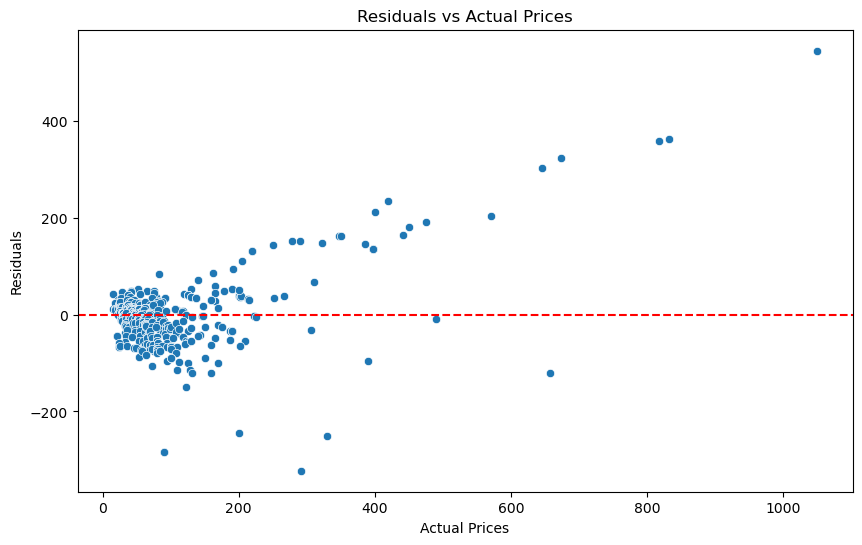

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
predictions_pd = pred.predictions.select("price", "prediction").toPandas()

# Calculate residuals
predictions_pd['residuals'] = predictions_pd['price'] - predictions_pd['prediction']

# Plot residuals vs. actual price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='residuals', data=predictions_pd)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()
